<h3 align="center" style="margin-top:0">Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II </h1>

<p align="center">
  <img src="amazon-uk-logo-feature.jpg" alt="Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights" width="440">
</p>

<p align="center"><em>EDA Univariate Analysis:</em></p>

<p align="center">
  <strong> David Hernández
</p>

<p align="center">
  <strong> November 2025
</p>

<hr style="margin:18px 0">

## 1. Introduction

**Objective:** Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Data Source: https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv("C:/Users/jdhernandezd/Documents/IRONHACK/Labs/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


##### Part 1: Analyzing Best-Seller Trends Across Product Categories

In [3]:
# Crosstab Analysis
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
# Chi-Squared Test
# from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(crosstab)

chi2, p, dof


(36540.20270061387, 0.0, 295)

In [5]:
# Cramér's V
# import numpy as np

n = crosstab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape)-1)))

cramers_v

# Scale for interpretation:
# 0.0 – 0.1  Very weak
# 0.1 – 0.2  Weak
# 0.2 – 0.3  Moderate
# 0.3+  Strong


0.1222829439760564

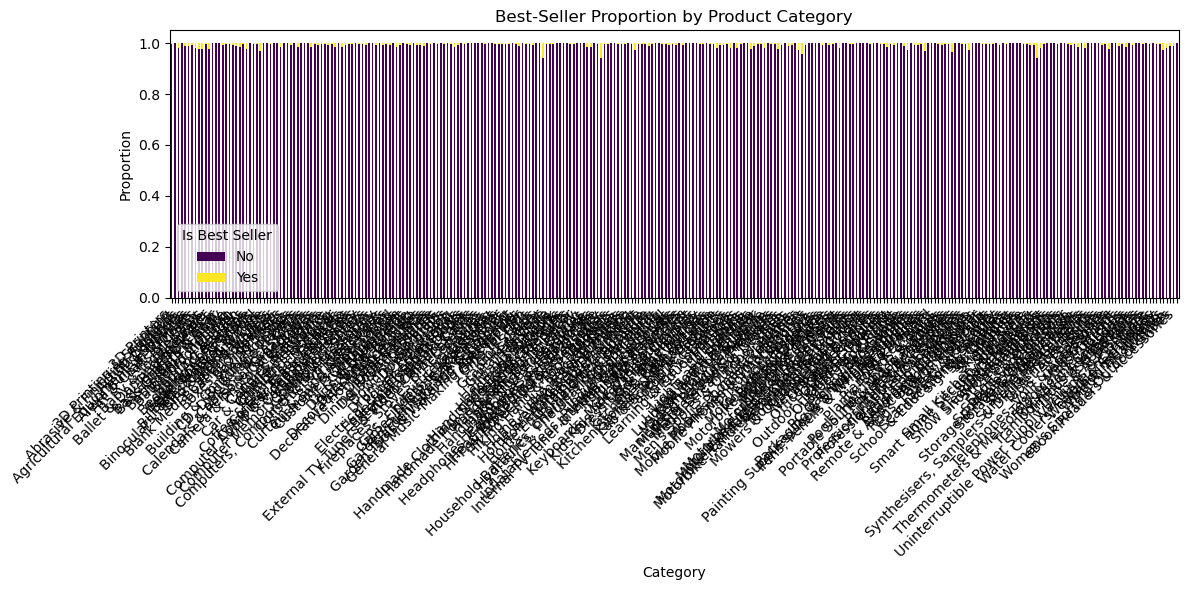

In [6]:
# Stacked Bar Chart

crosstab_norm = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

crosstab_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='viridis'
)

plt.title("Best-Seller Proportion by Product Category")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.legend(title="Is Best Seller", labels=["No", "Yes"])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
# Need to limit to top categories

In [7]:
best_seller_ratio = (
    pd.crosstab(df['category'], df['isBestSeller'], normalize='index')[True]
    .sort_values(ascending=False)
)

best_seller_ratio.head(10)


category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.030200
Home Brewing & Wine Making        0.028455
Wind Instruments                  0.028000
Mirrors                           0.028000
Name: True, dtype: float64

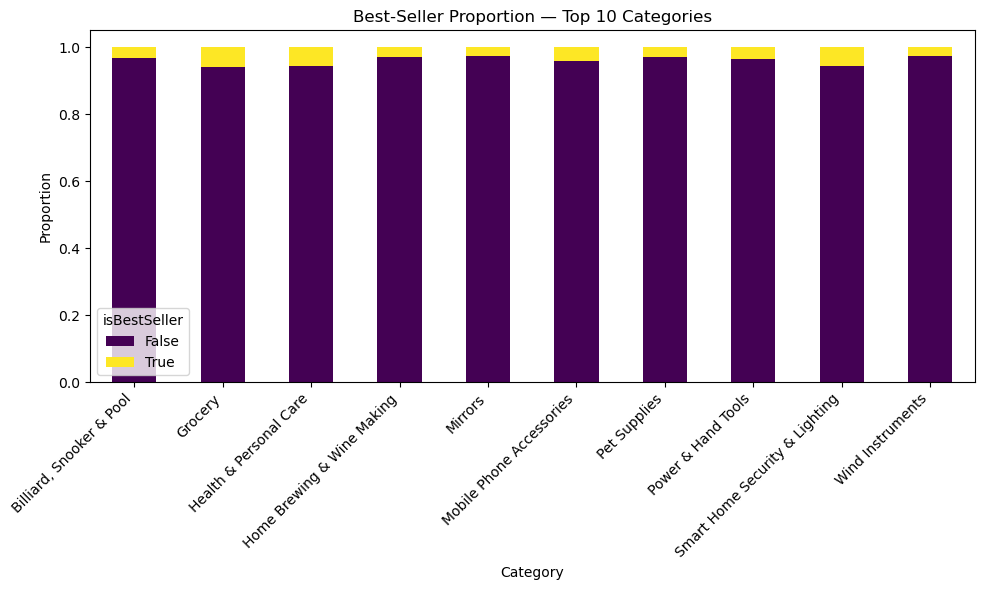

In [8]:
top10 = best_seller_ratio.head(10).index

subset = df[df['category'].isin(top10)]

crosstab_top10 = pd.crosstab(subset['category'], subset['isBestSeller'], normalize='index')

crosstab_top10.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='viridis'
)

plt.title("Best-Seller Proportion — Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


###  Business Summary — Analyzing Best-Seller Trends Across Product Categories

- Product category does have a statistically significant impact on whether a product becomes a best-seller.
- However, the strength of this relationship is weak (Cramér’s V = 0.122).
- Even in the top-performing categories, best-sellers represent only a small proportion of all listings.
- This suggests that success on Amazon UK depends on factors beyond just category—such as brand, price positioning, product quality, marketing, and reviews.


Part 2: Exploring Product Prices and Ratings Across Categories and Brands

Objective: Investigate how different product categories influence product prices.

In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-44.01, 99.99000000000001)

In [10]:
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliers.shape


(2115963, 9)

In [11]:
top20_categories = df_no_outliers['category'].value_counts().head(20).index

In [12]:
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top20_categories)]


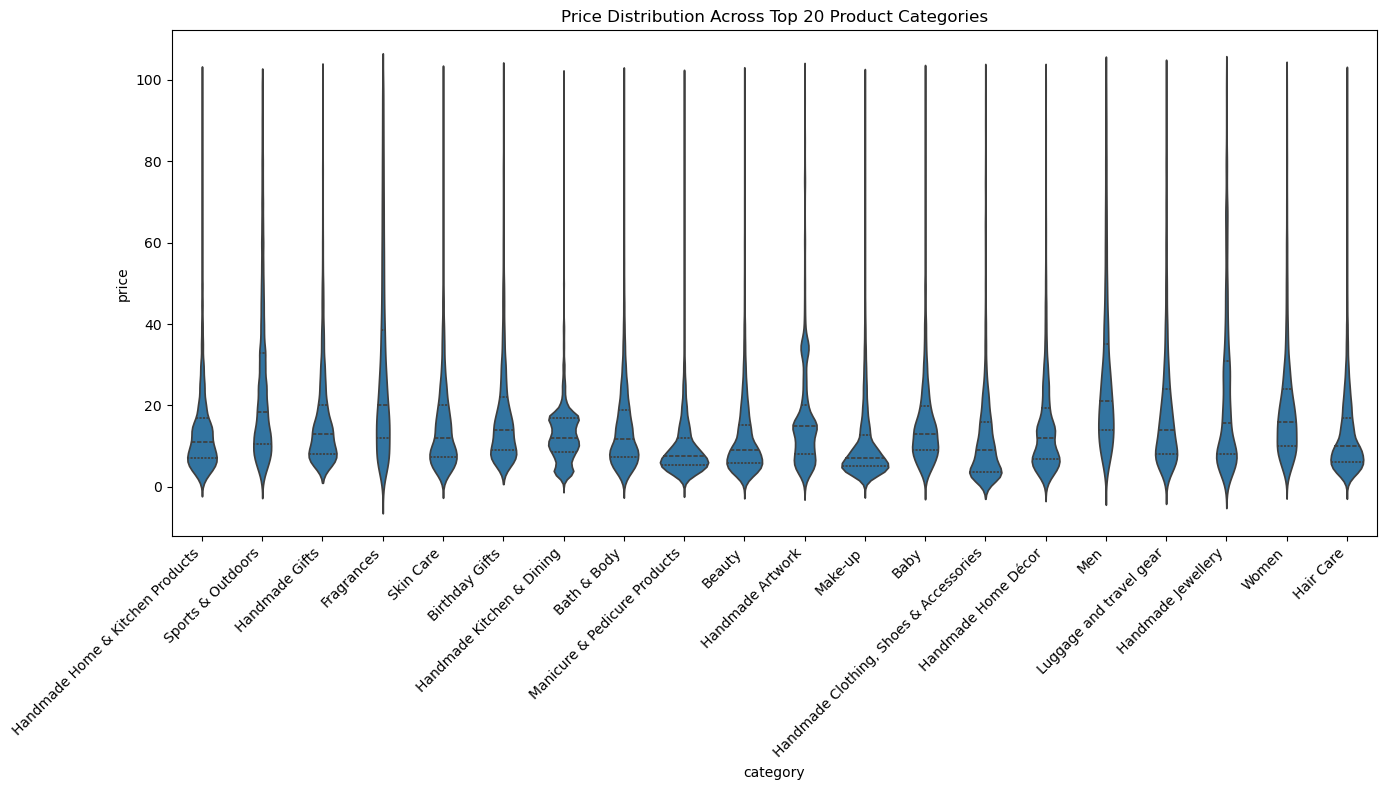

In [13]:
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=df_top20,
    x='category',
    y='price',
    inner='quartile'
)
plt.xticks(rotation=45, ha='right')
plt.title("Price Distribution Across Top 20 Product Categories")
plt.tight_layout()
plt.show()


In [14]:
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
median_prices.head(10)


category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64

In [15]:
top10_categories = df_no_outliers['category'].value_counts().head(10).index


In [16]:
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories)]


In [17]:
avg_prices = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)
avg_prices


category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

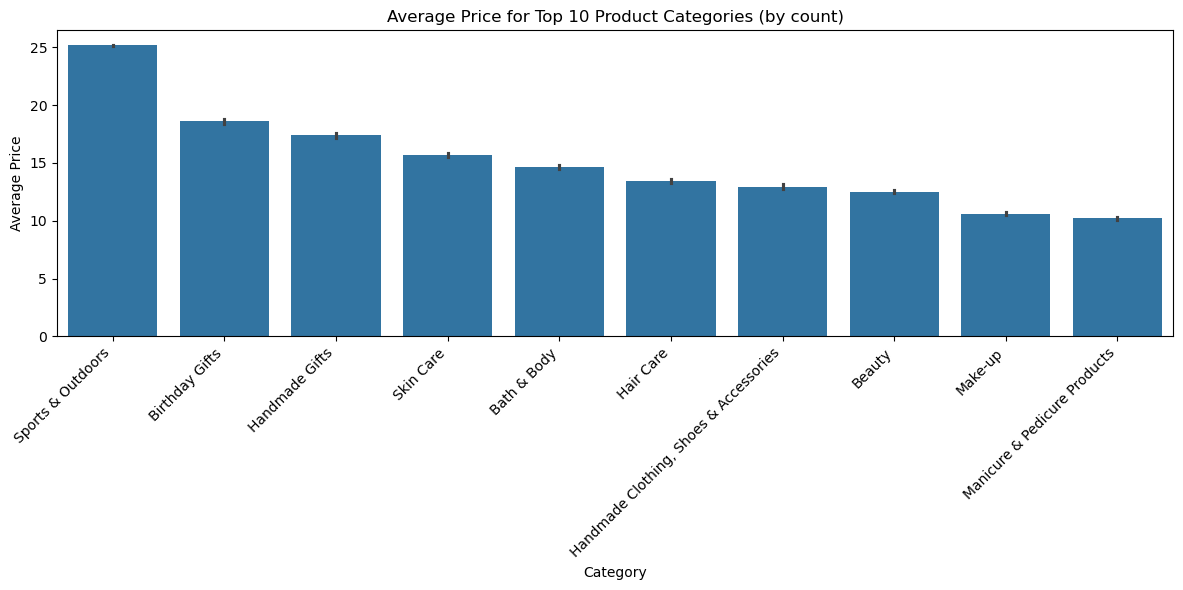

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_top10,
    x='category',
    y='price',
    estimator='mean',
    order=avg_prices.index
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Price for Top 10 Product Categories (by count)")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()


In [19]:
avg_prices_global = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False)
avg_prices_global.head(10)


category
Motherboards         68.772432
Boxing Shoes         67.417803
Desktop PCs          66.915562
Tablets              66.552971
Graphics Cards       65.103509
Digital Frames       60.745129
Streaming Clients    60.241803
Hockey Shoes         60.094796
Computer Cases       58.339884
Skiing Poles         57.867770
Name: price, dtype: float64

In [20]:
top10_categories = df_no_outliers['category'].value_counts().head(10).index


In [21]:
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top10_categories)]


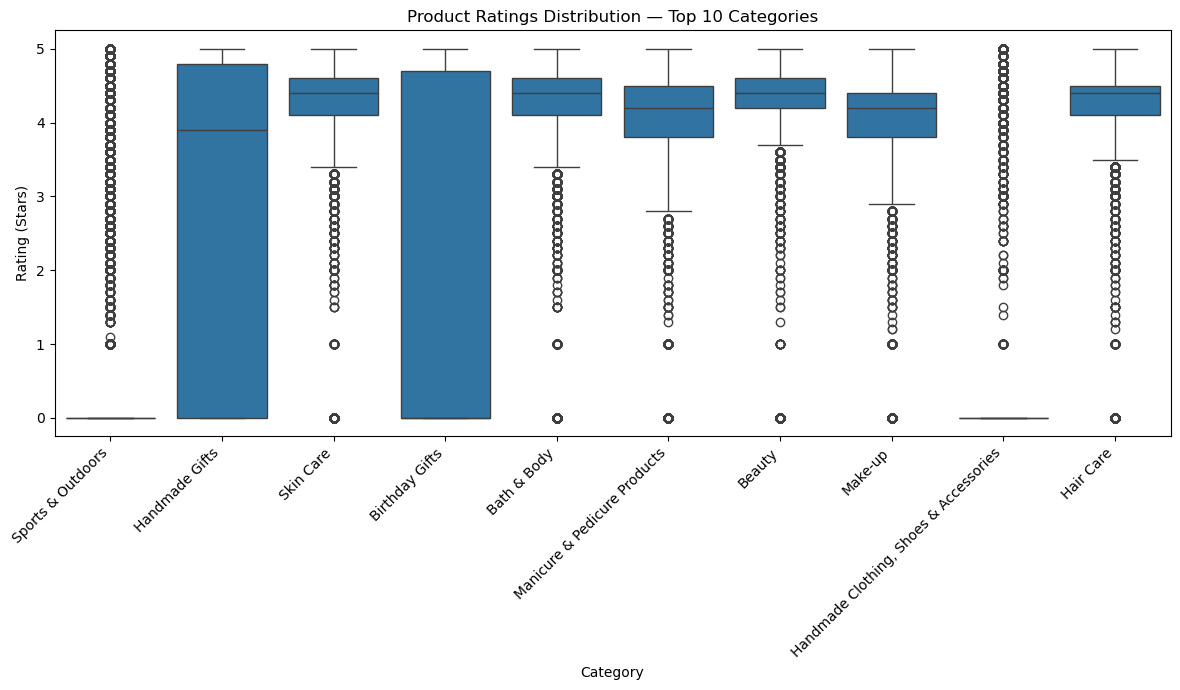

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(
    data=df_top10,
    x='category',
    y='stars'
)
plt.xticks(rotation=45, ha='right')
plt.title("Product Ratings Distribution — Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Rating (Stars)")
plt.tight_layout()
plt.show()


In [23]:
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
median_ratings.head(10)


category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Hobbies                         4.6
Beer, Wine & Spirits            4.6
Laptop Accessories              4.6
Cables & Accessories            4.5
CPUs                            4.5
Name: stars, dtype: float64

### Business Summary — Exploring Product Prices Across Categories

- Product prices vary substantially across categories, even after removing outliers using the IQR method.

- Some categories consistently command higher prices, with electronics-related categories (such as Motherboards) showing the highest median and average price levels.

- This indicates that certain product groups occupy more premium segments within Amazon UK, likely due to higher production costs, technical complexity, or strong consumer demand.

- Other categories maintain lower and more compact price ranges, suggesting highly competitive or low-margin product spaces.

- Overall, price differences are strongly influenced by category, highlighting the importance for sellers to understand category-specific pricing patterns when positioning their products.

Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

In [25]:
corr_price_rating = df_no_outliers['price'].corr(df_no_outliers['stars'])
corr_price_rating

-0.0776729987818137

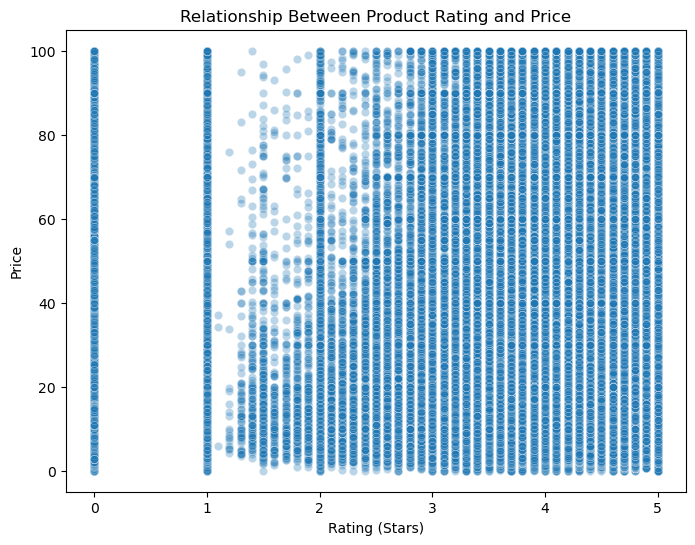

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_no_outliers,
    x='stars',
    y='price',
    alpha=0.3
)
plt.title("Relationship Between Product Rating and Price")
plt.xlabel("Rating (Stars)")
plt.ylabel("Price")
plt.show()


In [28]:
numeric_df = df_no_outliers.select_dtypes(include=['number'])
numeric_df.head()


,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


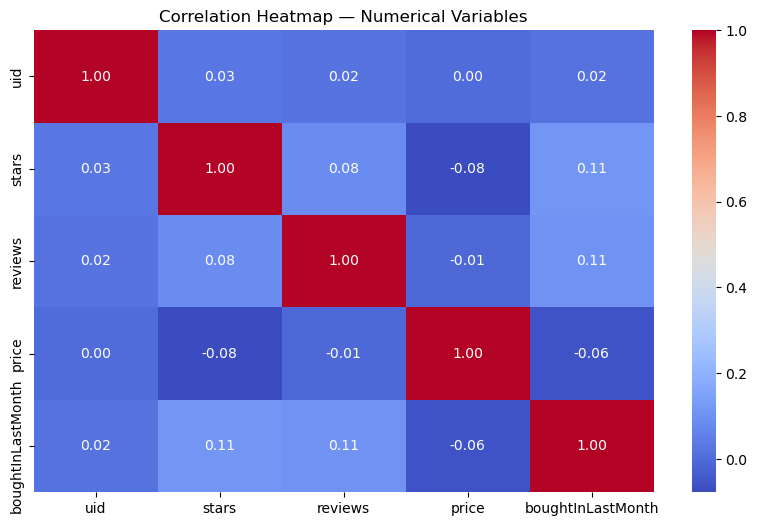

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap — Numerical Variables")
plt.show()


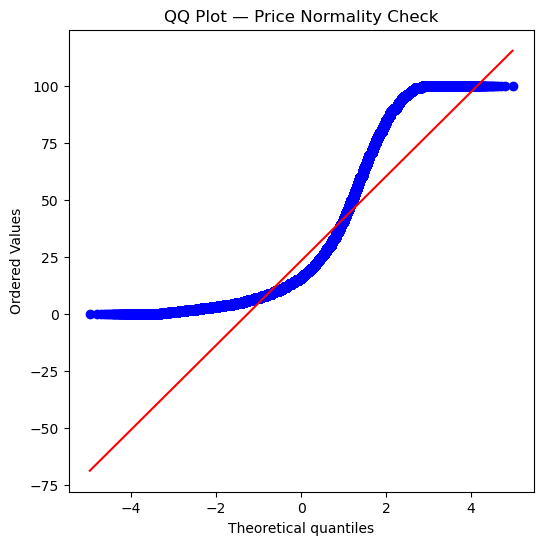

In [31]:
#import scipy.stats as stats
#import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)

plt.title("QQ Plot — Price Normality Check")
plt.show()


### Business Summary — Investigating the Interplay Between Product Prices and Ratings

- The QQ plot shows that product prices do not follow a normal distribution.
- The S-shaped pattern indicates strong right skew and heavy tails, which is typical of real-world e-commerce pricing. Even after removing outliers using the IQR method, the distribution remains non-normal.